In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
# sns.set(style="pastel") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline    
%config InlineBackend.figure_format = 'retina' 
import warnings
warnings.simplefilter(action='ignore')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
# sns.set(style="pastel") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
import torch.nn.functional as F
from matplotlib import rcParams
config = {
    "font.family": 'serif', # 衬线字体
    "font.size": 10, # 相当于六号大小
    "font.serif": ['SimSun'], # 宋体
    "mathtext.fontset": 'stix', # matplotlib渲染数学字体时使用的字体，和Times New Roman差别不大
    'axes.unicode_minus': False # 处理负号，即-号
}
rcParams.update(config)

In [2]:
data=pd.read_excel("人口结构数据.xlsx",sheet_name="Sheet2")

In [47]:
age1=data["0-14岁"]
age2=data["15-64岁"]
age3=data["65岁及以上"]

In [48]:
data.columns

Index(['年份', '全国总人口', '0-14岁', '15-64岁', '65岁及以上'], dtype='object')

In [49]:
al=data["全国总人口"]

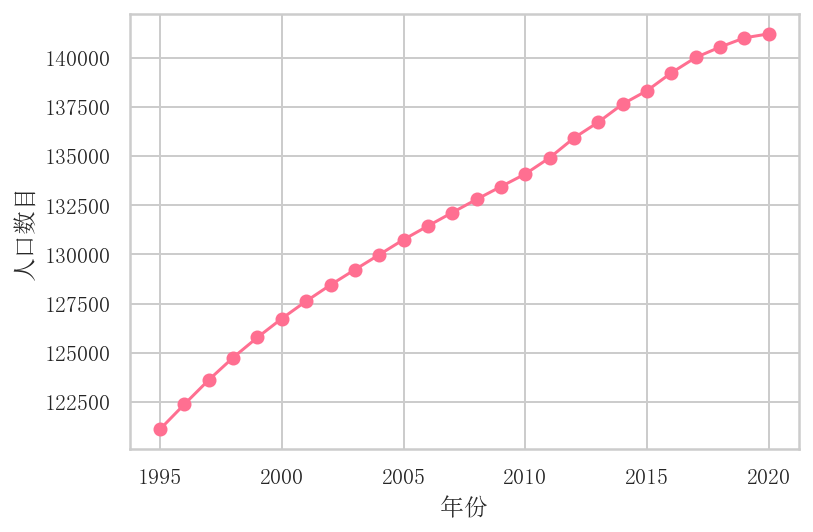

In [50]:
plt.show()
plt.plot(xr,al,color="#FF6F91",marker="o")
plt.xlabel("年份")
plt.ylabel("人口数目")
plt.show()

In [4]:
# from fbprophet import Prophet

In [5]:
xr=data["年份"]

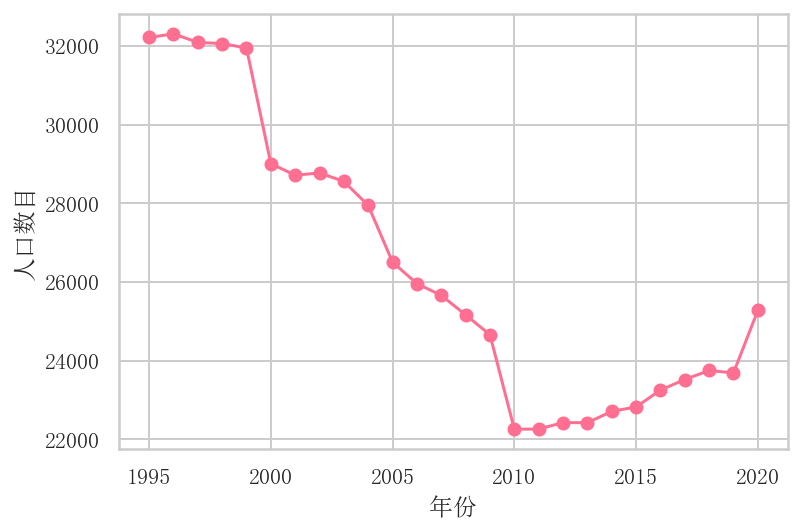

In [6]:
plt.plot(xr,age1,color="#FF6F91",marker="o")
plt.xlabel("年份")
plt.ylabel("人口数目")
plt.show()

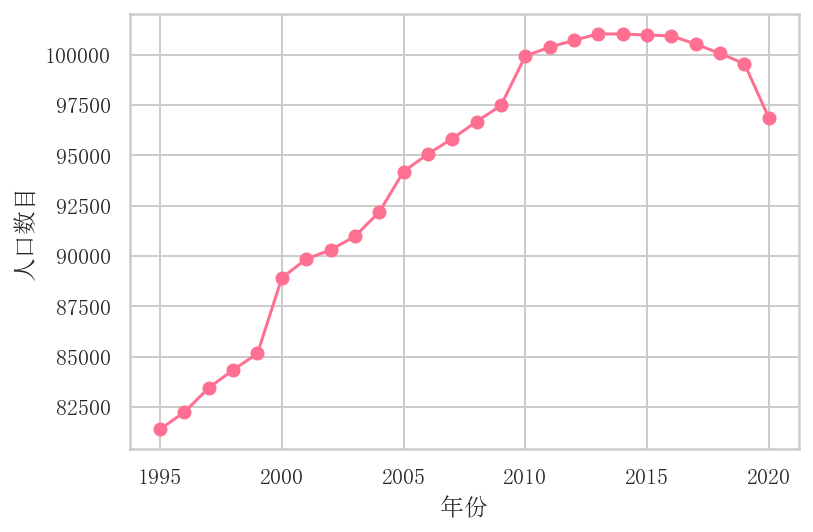

In [7]:
plt.plot(xr,age2,color="#FF6F91",marker="o")
plt.xlabel("年份")
plt.ylabel("人口数目")
plt.show()

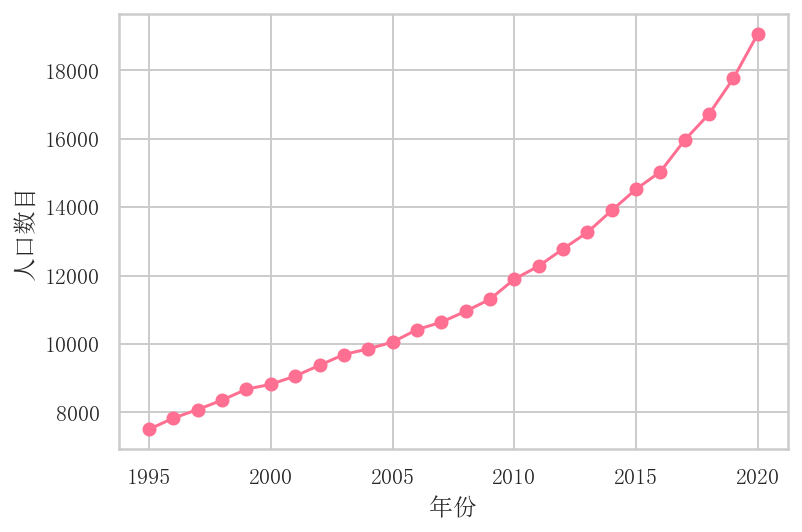

In [8]:
plt.plot(xr,age3,color="#FF6F91",marker="o")
plt.xlabel("年份")
plt.ylabel("人口数目")
plt.show()

In [9]:
# training_set = data["0-14岁"].values
# training_set = data["15-64岁"].values
training_set = data["65岁及以上"].values

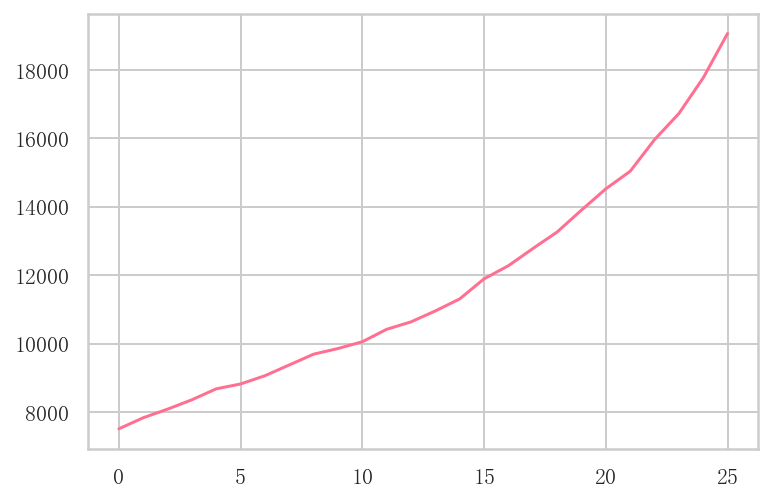

In [10]:
plt.plot(training_set,color="#FF6F91")
plt.show()

In [11]:
def sliding_windows(data, seq_length):
    x=[]
    y=[]
    
    for i in range(len(data)-seq_length-1):
        x_=data[i:(i+seq_length)]
        y_=data[i+seq_length]
        x.append(x_)
        y.append(y_)
    return np.array(x),np.array(y)
seq_length = 5
x, y = sliding_windows(training_set, seq_length)

In [12]:
sc = MinMaxScaler()
training_data = sc.fit_transform(training_set.reshape(-1,1))

In [13]:
seq_length = 4
x, y = sliding_windows(training_data, seq_length)

In [14]:
train_size = int(len(y) * 0.8)
test_size = len(y) - train_size

In [15]:
dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

In [16]:
## 直接定义变量
trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

In [17]:
testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

In [18]:
class LSTM(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size,seq_length,bidirectional=True): # bidirectiona=l为双向,bidirectiona为2为单向
        super(LSTM,self).__init__()
        
        self.num_classes=num_classes
        self.num_layers=num_layers
        self.input_size=input_size
        self.hidden_size=hidden_size
        self.seq_length = seq_length
        
        self.lstm=nn.LSTM(input_size=input_size,hidden_size=hidden_size,num_layers=num_layers,batch_first=True)
        self.pre=nn.Linear(hidden_size,num_classes)
    
    def forward(self,x):
        # 初始化状态参数，这个要知道原理才理解
        h_0=Variable(torch.zeros(self.num_layers,x.size(0),self.hidden_size))
        c_0=Variable(torch.zeros(self.num_layers,x.size(0),self.hidden_size))
    
        ula,(h_out,_)=self.lstm(x,(h_0,c_0))
        h_out=h_out.view(-1,self.hidden_size)
        out=self.pre(h_out)
    
        return out

In [19]:
num_epochs = 4000
learning_rate = 0.01

input_size = 1
hidden_size = 3
num_layers = 1
num_classes=1

In [20]:
lstm = LSTM(num_classes,input_size, hidden_size, num_layers)

In [21]:
criterion = torch.nn.MSELoss()    # MSE
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

In [22]:
for epoch in range(num_epochs):
    outputs = lstm(trainX)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, trainY)
    
    loss.backward()
    
    optimizer.step()
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.09642
Epoch: 100, loss: 0.00414
Epoch: 200, loss: 0.00003
Epoch: 300, loss: 0.00003
Epoch: 400, loss: 0.00003
Epoch: 500, loss: 0.00003
Epoch: 600, loss: 0.00003
Epoch: 700, loss: 0.00003
Epoch: 800, loss: 0.00003
Epoch: 900, loss: 0.00003
Epoch: 1000, loss: 0.00003
Epoch: 1100, loss: 0.00003
Epoch: 1200, loss: 0.00003
Epoch: 1300, loss: 0.00003
Epoch: 1400, loss: 0.00003
Epoch: 1500, loss: 0.00003
Epoch: 1600, loss: 0.00003
Epoch: 1700, loss: 0.00003
Epoch: 1800, loss: 0.00003
Epoch: 1900, loss: 0.00003
Epoch: 2000, loss: 0.00003
Epoch: 2100, loss: 0.00003
Epoch: 2200, loss: 0.00003
Epoch: 2300, loss: 0.00003
Epoch: 2400, loss: 0.00003
Epoch: 2500, loss: 0.00003
Epoch: 2600, loss: 0.00003
Epoch: 2700, loss: 0.00003
Epoch: 2800, loss: 0.00003
Epoch: 2900, loss: 0.00003
Epoch: 3000, loss: 0.00003
Epoch: 3100, loss: 0.00003
Epoch: 3200, loss: 0.00003
Epoch: 3300, loss: 0.00003
Epoch: 3400, loss: 0.00003
Epoch: 3500, loss: 0.00003
Epoch: 3600, loss: 0.00003
Epoch: 3700, 

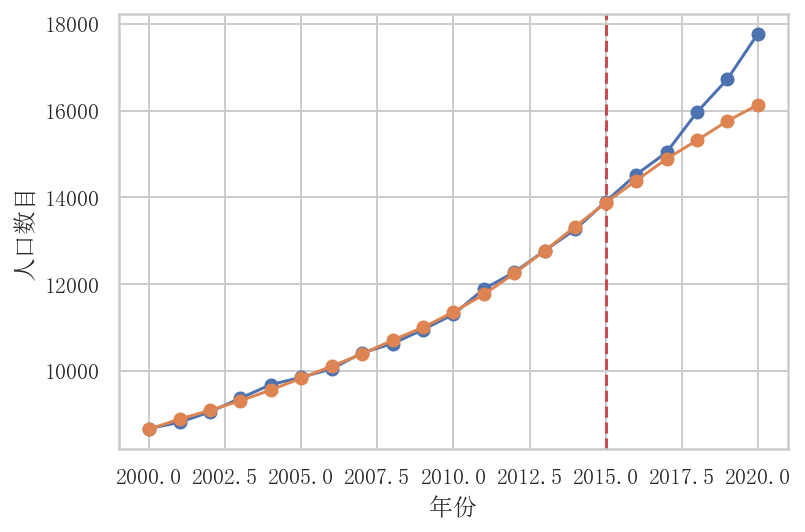

In [23]:
lstm.eval()
train_predict = lstm(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

plt.axvline(x=2015, c='r', linestyle='--')

plt.plot(xr[5:],dataY_plot,marker="o")
plt.plot(xr[5:],data_predict,marker="o")
plt.xlabel("年份")
plt.ylabel("人口数目")
plt.show()